In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

# K-means

In [2]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

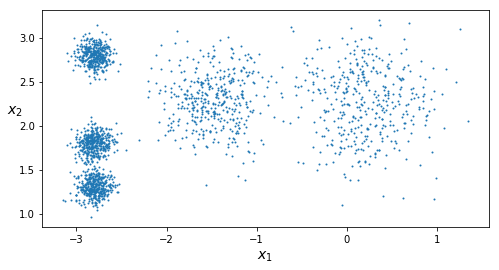

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
#save_fig("blobs_diagram")
plt.show()

In [5]:
k=5
kmeans = KMeans(n_clusters=k);
y_pred = kmeans.fit_predict(X);
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [6]:
#KMeans instance preserves a copy of the labels of the instances it was trained on, 
#available via the labels_ instance variable:
kmeans.labels_ #

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [7]:
kmeans is y_pred

False

In [8]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

### Predicting new instances

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) 
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

## Clusters decision boundary

In [10]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1],'.k', markersize=2);

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    #the following line draw a circle on the centroid
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9);
    #the following line draw a x inside the 
    #previous circle on the centroid
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)   
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1; # min of features
    maxs = X.max(axis=0) + 0.1; # max of features
    # the axes of the 2 considered features (y is not the vector of
    # labels)
    # get vectors from min to max 

    #meshgrid returns a matrix whose rows are the same (they are the 
    # coordinates on a grid [[0,1,2],[0,1,2],[0,1,2],])
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution));
    #flattening the vectors and make them columns of matrix to pre
    # predict the output
    #Z will be of shape resolution^2x1
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]);
    # get back to the shape resolutionXresolution
    Z = Z.reshape(xx.shape);
    #contourf([X, Y,] Z, [levels]
    #Z array-like(N, M): The height values over which the contour is drawn.
    
    #extent tells the limits of the plot
    #plot the colours
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2");
    #plot the countours
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


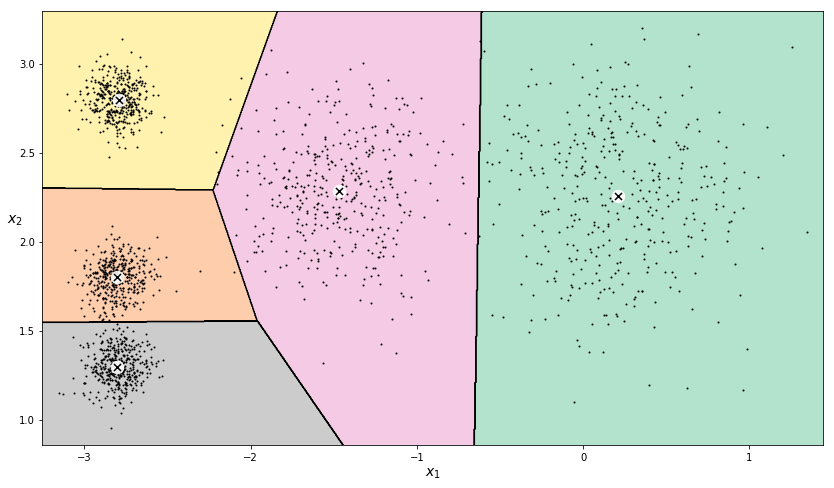

In [11]:
plt.figure(figsize=(14,8))
plot_decision_boundaries(kmeans,X)

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top left cluster and the central cluster).

#### K-Means algorithm does not behave very well when the blobs have very different diameters since all it cares about when assigning an instance to a cluster is the distance to the centroid.

## Hard clustering
Assigns each instance to a single cluster

## Soft clustering
Assign each instance a score for every class.

`transform` methodmeasures the distance from each instance to every centroid

In [12]:
print(kmeans.predict(X_new))
kmeans.transform(X_new)


[0 0 3 3]


array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.
    
The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (it randomly initializes the centroids) (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around.

The computational complexity of the algorithm is generally linear with regards to the number of instances m, the number of clusters k and the number of dimensions $n$. This is **only true when the data has a clustering structure**. If it does not, then in the worst case scenario the complexity can increase exponentially with the number of instances. In practice, however, this rarely happens, and K-Means is generally one of the fastest clustering algorithms.

The algorithm might converge to the incorrect solution.

In [13]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
    n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

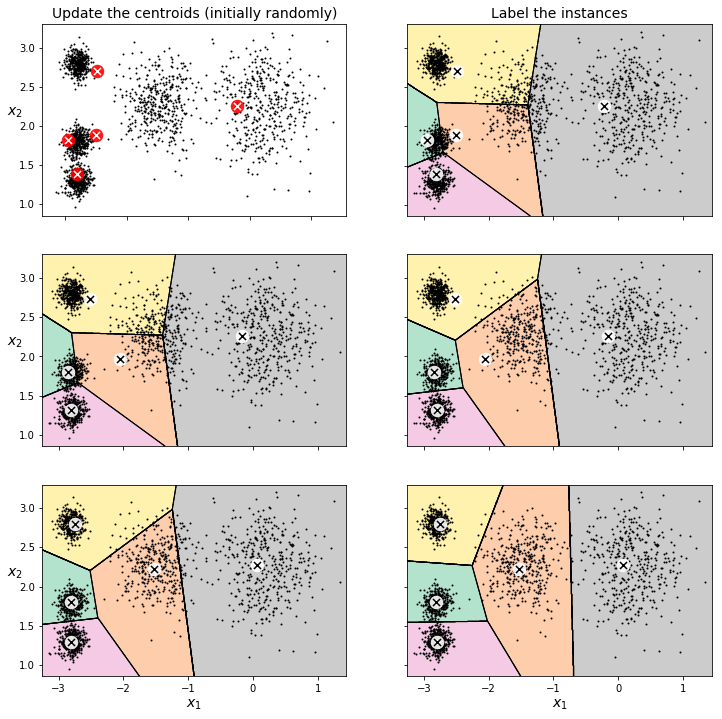

In [14]:
plt.figure(figsize=(12, 12))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

#save_fig("kmeans_algorithm_diagram")
plt.show()

If you happen to know approximately where the centroids should be, then you can set the `init` hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:
    
    good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
    kmeans = KMeans(n_clusters=5, init=good_init, n_init=1);

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. This is controlled by the `n_init` hyperparameter: by default, it is equal to 10, which means that the whole algorithm described earlier actually runs 10 times when you call `fit()`, and Scikit-Learn keeps the best solution, according to a  performance metric! It is called the **model’s inertia**: this is the mean squared distance between each instance and its closest centroid. The KMeans class runs the algorithm `n_init` times and keeps the model with the lowest inertia.

The inertia variable is contained in the **`inertia_`** variable.

The `score()` method returns the negative inertia, in order to respect the paradigm *greater is better*.

Multiple runs return (sometimes very) different solutions:


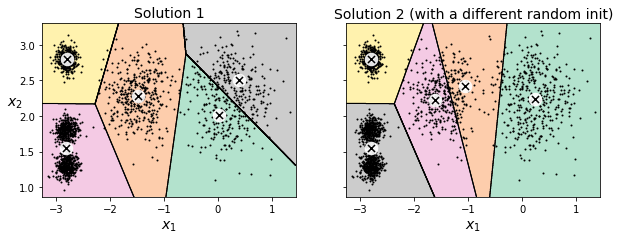

In [15]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
        
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

#save_fig("kmeans_variability_diagram")
plt.show()

In [16]:
X_dist = kmeans.transform(X)
print(np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2))
print(kmeans.inertia_)


211.59853725816856
211.5985372581684


**IMPROVEMENTS**

An important improvement to the K-Means algorithm, called K-Means+\+, was proposed by introducing a smarter initialization step that tends to select centroids distant from one another, and this makes the K-Means algorithm much less likely to converge to a sub-optimal solution. They showed that the additional computation required for the smarter initialization step is well worth it since it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution. Here is the K-Means++ initialization algorithm:

 - take one centroid $c$ chosen at random from data
 - take a new centroid $c^{(i)}$ choosing an instance $x^{(i)}$ with probability $D(x^{(i)})^2/\sum_{j=1}^m D(x^{(i)})^2$ where $D$ is the distance between the instance and the centroid. This probability distribution ensures that instances further away from already chosen centroids are much more likely be selected as centroids.
 - Repeat the previous step until all $k$ centroids have been chosen.
 
 **KMeans uses this uinitializatio**.

Other improvements exist:
 - triangle inequality can be exploited to avoid unnecesssary distance calculation and keeping track of the lower and upper bounds. This is done by default by the algorithm. but it can be forced to do differently by setting hyperparameter **`algorithm`** to `full`.
 - Instead of using the full dataset at each iteration, the algo‐ rithm is capable of using mini-batches, moving the centroids just slightly at each iteration. The minibatch algoruthm is implemented in the **`MiniBatchKmMeans`** calss:

In [17]:
from sklearn.cluster import MiniBatchKMeans
mminibatch_KM = MiniBatchKMeans(n_clusters=5);
mminibatch_KM.fit(X)
mminibatch_KM.inertia_

212.14863808635928

If the dataset does not fit in memory, the simplest option is to use the `memmap` class, as we did for incremental PCA. Alternatively, you can pass one mini-batch at a time to the `partial_fit()` method, but this will require much more work, since you will need to perform multiple initializations and select the best one yourself 

Mini-batch K-Means algorithm is much faster than the regular K- Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases. The difference between the two inertia curves remains fairly constant, but this difference becomes more and more significant as k increases, since the inertia becomes smaller and smaller.

In [18]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

np.random.seed(42)

k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [19]:
best_kmeans.score(X)

-211.70999744411483

Let's plot the inertia ratio and the training time ratio between Mini-batch K-Means and regular K-Means:

In [22]:
from timeit import timeit
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_
    
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
#plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
#plt.ylabel("Training time (seconds)", fontsize=14)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])
#plt.legend(fontsize=14)

#save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

7/100

KeyboardInterrupt: 

# Finding the optimal k
The inertia always decreases when $k$ increase: the more the clusters the less the distance between instances and the closest centroid.

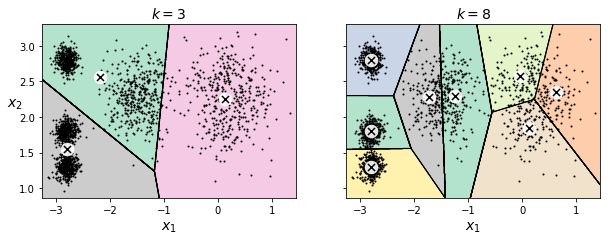

653.2167190021553
119.11983416102879


In [21]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
#save_fig("bad_n_clusters_diagram")
plt.show();
print(kmeans_k3.inertia_)
print(kmeans_k8.inertia_)

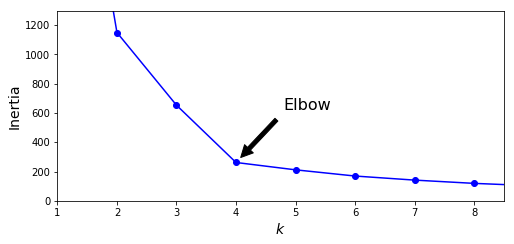

In [23]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
#save_fig("inertia_vs_k_diagram")
plt.show()

### Metrics
According to this curve the best choice would be $4$. However, this is a course measure.

#### Silhoutette coefficient
A more precise approach (also more computationally expensive) is to use the **silhouette score**, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to $$\frac{(b – a)}{max(a, b)}$$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance’s own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster. To compute the silhouette score, you can use Scikit-Learn’s **`silhouette_score()`** function, giving it all the instances in the dataset, and the labels they were assigned:

In [24]:
from sklearn.metrics import silhouette_score 
silhouette_score(X, kmeans.labels_)

0.6068660656395705

#### Plot of the silhouette score
The silhouette score also has the advantage of giving how better or worse a value for $k$ is compared to other values.

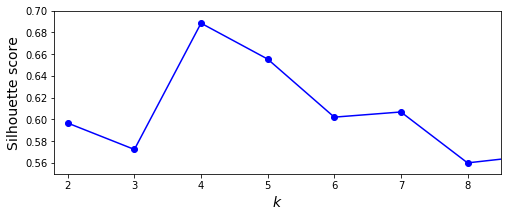

In [25]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

#### Silhoutte diagram
Visualization obtained when you plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. 

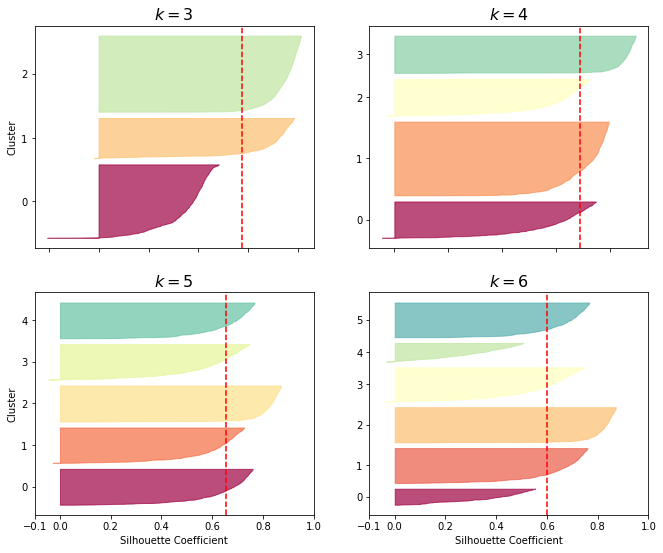

In [26]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
plt.figure(figsize=(11, 9))
#defined before
#kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
#                for k in range(1, 10)];
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    #1st model has one cluster
    y_pred = kmeans_per_k[k - 1].labels_
    #Compute the Silhouette Coefficient for each sample.
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30# integer division
    pos = padding
    ticks = []
    for i in range(k):
        #get the coefficient of one cluster and sort them
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        #fill the area between two vertical curves.
        #fill_betweenx(self, y, x1, x2=0, where=None, step=None, 
            #interpolate=False, *, data=None, **kwargs)[source]
        #y : array (length N)
        #    The y coordinates of the nodes defining the curves.

        #x1 : array (length N) or scalar
            #The x coordinates of the nodes defining the first curve.
        
        #x2 : array (length N) or scalar, optional, default: 0
            #The x coordinates of the nodes defining the second curve.

        #np.arange(pos, pos + len(coeffs)): ydata, 
        #0 data starts from 0(centred,) (i.e., the first range)
        #coeffs: the second range
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # the knife shape is due to sorted data
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_diagram")
plt.show()

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters

#### 4 vs. 5
When $k=4$, the cluster at index 1 (the third from the top), is rather big, while when $k=5$, all clusters have similar sizes, so even though the overall silhouette score from $k=4$ is slightly greater than for $k=5$, it seems like a good idea to use $k=5$ to get clusters of similar sizes.

# LIMITS
 - several runs
 - number of clusters must be know
 - does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes

(1250, 2)


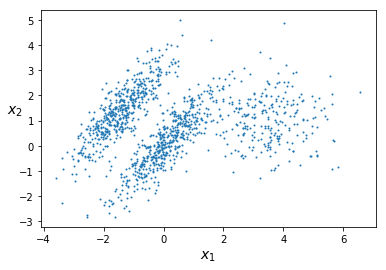

In [27]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
#centers=1 tells to generate data from just (random) centre
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
print(X.shape)
plot_clusters(X)

In [28]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

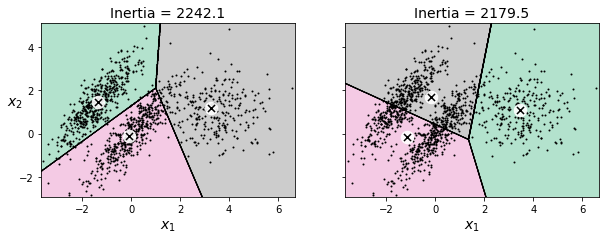

In [29]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

#save_fig("bad_kmeans_diagram")
plt.show()

The solution on the left is better, but it still chops off 25% of the middle cluster and assigns it to the cluster on the right. 

#### It is important to scale the input features before you run K-Means, or else the clusters may be very stretched, and K-Means will per‐ form poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

# Image segmentation


In [30]:
import os
from matplotlib.image import imread
image = imread(os.path.join("../HandsOnSolutions/handson-ml/images","unsupervised_learning","ladybug.png"))
image.shape

(533, 800, 3)

The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means.
For example, it may identify a color cluster for all shades of green. Next, for each color (e.g., dark green), it looks for the mean color of the pixel’s color cluster. For example, all shades of green may be replaced with the same light green color (assuming the mean color of the green cluster is light green). Finally it reshapes this long list of colors to get the same shape as the original image. And we’re done!

In [31]:
X = image.reshape(-1, 3);
km = KMeans(n_clusters=8).fit(X);

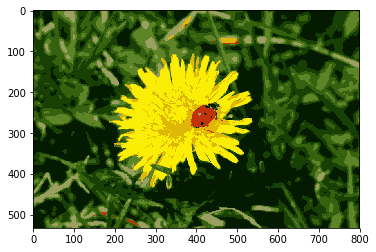

In [32]:
#Although labels_ is longer than cluster_centers_ it creates a matrix
segmented_img = km.cluster_centers_[km.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

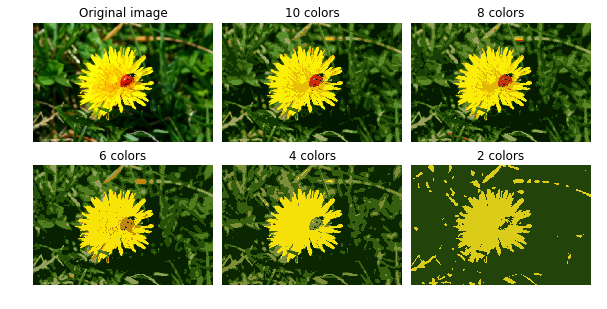

In [33]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

The ladybug got discarded because it has only few pixels and kmeans prefers clusters of similar size

In [34]:
km.cluster_centers_[((1,3,4),)]

array([[0.02189499, 0.1087721 , 0.00571569],
       [0.7638174 , 0.20156583, 0.04390832],
       [0.9829711 , 0.9331813 , 0.02559364]], dtype=float32)

## Clustering can be used for dimensionality reduction

In [35]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, solver='liblinear', multi_class="ovr")
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9666666666666667

### Create a pipeline

In [37]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("km", KMeans(n_clusters=50, random_state=42)), 
                     ("log_reg", LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42))]);
pipeline.fit(X_train, y_train);
pipeline.score(X_test,y_test)

0.9822222222222222

But we chose the number of clusters k completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for k is much simpler than earlier: there’s no need to perform silhouette analysis or minimize the inertia, the best value of k is simply the one that results in the best classification performance during cross-validation.

In [45]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([("km", KMeans(n_clusters=50, random_state=42)), 
                     ("log_reg", LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42))]);
#note in the following dictionary the notation: estimator__parameter
param_grid = dict(km__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] km__n_clusters=2 ................................................
[CV] ................................. km__n_clusters=2, total=   0.1s
[CV] km__n_clusters=2 ................................................
[CV] ................................. km__n_clusters=2, total=   0.1s
[CV] km__n_clusters=2 ................................................
[CV] ................................. km__n_clusters=2, total=   0.1s
[CV] km__n_clusters=3 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................. km__n_clusters=3, total=   0.1s
[CV] km__n_clusters=3 ................................................
[CV] ................................. km__n_clusters=3, total=   0.1s
[CV] km__n_clusters=3 ................................................
[CV] ................................. km__n_clusters=3, total=   0.1s
[CV] km__n_clusters=4 ................................................
[CV] ................................. km__n_clusters=4, total=   0.1s
[CV] km__n_clusters=4 ................................................
[CV] ................................. km__n_clusters=4, total=   0.1s
[CV] km__n_clusters=4 ................................................
[CV] ................................. km__n_clusters=4, total=   0.1s
[CV] km__n_clusters=5 ................................................
[CV] ................................. km__n_clusters=5, total=   0.1s
[CV] km__n_clusters=5 ................................................
[CV] .

[CV] ................................ km__n_clusters=22, total=   0.2s
[CV] km__n_clusters=22 ...............................................
[CV] ................................ km__n_clusters=22, total=   0.2s
[CV] km__n_clusters=23 ...............................................
[CV] ................................ km__n_clusters=23, total=   0.2s
[CV] km__n_clusters=23 ...............................................
[CV] ................................ km__n_clusters=23, total=   0.2s
[CV] km__n_clusters=23 ...............................................
[CV] ................................ km__n_clusters=23, total=   0.2s
[CV] km__n_clusters=24 ...............................................
[CV] ................................ km__n_clusters=24, total=   0.2s
[CV] km__n_clusters=24 ...............................................
[CV] ................................ km__n_clusters=24, total=   0.2s
[CV] km__n_clusters=24 ...............................................
[CV] .

[CV] ................................ km__n_clusters=41, total=   0.3s
[CV] km__n_clusters=42 ...............................................
[CV] ................................ km__n_clusters=42, total=   0.3s
[CV] km__n_clusters=42 ...............................................
[CV] ................................ km__n_clusters=42, total=   0.4s
[CV] km__n_clusters=42 ...............................................
[CV] ................................ km__n_clusters=42, total=   0.3s
[CV] km__n_clusters=43 ...............................................
[CV] ................................ km__n_clusters=43, total=   0.4s
[CV] km__n_clusters=43 ...............................................
[CV] ................................ km__n_clusters=43, total=   0.4s
[CV] km__n_clusters=43 ...............................................
[CV] ................................ km__n_clusters=43, total=   0.3s
[CV] km__n_clusters=44 ...............................................
[CV] .

[CV] ................................ km__n_clusters=61, total=   0.5s
[CV] km__n_clusters=61 ...............................................
[CV] ................................ km__n_clusters=61, total=   0.5s
[CV] km__n_clusters=61 ...............................................
[CV] ................................ km__n_clusters=61, total=   0.5s
[CV] km__n_clusters=62 ...............................................
[CV] ................................ km__n_clusters=62, total=   0.5s
[CV] km__n_clusters=62 ...............................................
[CV] ................................ km__n_clusters=62, total=   0.5s
[CV] km__n_clusters=62 ...............................................
[CV] ................................ km__n_clusters=62, total=   0.5s
[CV] km__n_clusters=63 ...............................................
[CV] ................................ km__n_clusters=63, total=   0.5s
[CV] km__n_clusters=63 ...............................................
[CV] .

[CV] ................................ km__n_clusters=80, total=   0.5s
[CV] km__n_clusters=80 ...............................................
[CV] ................................ km__n_clusters=80, total=   0.6s
[CV] km__n_clusters=81 ...............................................
[CV] ................................ km__n_clusters=81, total=   0.6s
[CV] km__n_clusters=81 ...............................................
[CV] ................................ km__n_clusters=81, total=   0.6s
[CV] km__n_clusters=81 ...............................................
[CV] ................................ km__n_clusters=81, total=   0.5s
[CV] km__n_clusters=82 ...............................................
[CV] ................................ km__n_clusters=82, total=   0.5s
[CV] km__n_clusters=82 ...............................................
[CV] ................................ km__n_clusters=82, total=   0.6s
[CV] km__n_clusters=82 ...............................................
[CV] .

[CV] ................................ km__n_clusters=99, total=   0.7s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('km', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual...lty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'km__n_clusters': range(2, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [47]:
grid_clf.best_params_

{'km__n_clusters': 90}

In [48]:
grid_clf.score(X_test, y_test)

0.9844444444444445

# Semi-supervised learning

In [51]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8266666666666667

First, let’s cluster the training set into 50 clusters, then for each cluster let’s find the image closest to the centroid. We will call these images the **representative images**:

In [52]:
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
#find the image closest to the centroid
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

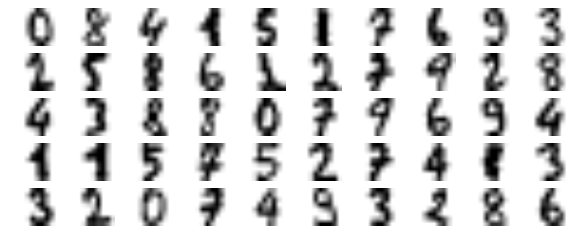

In [54]:
plt.figure(figsize=(10, 4))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

#save_fig("representative_images_diagram", tight_layout=False)
plt.show()

Now let’s look at each image and manually label it:

In [84]:
y_representative_digits = np.array([0,8,4,1,5,1,7,6,9,3,
                                    2,5,8,6,1,2,7,9,2,8,
                                    4,3,8,8,0,7,9,6,9,4,
                                    1,1,5,7,5,2,7,4,1,3,
                                    3,2,0,7,4,9,3,2,8,6])

In [85]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.92

## what if we propagated the labels to all the other instances in the same cluster? 

In [86]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [87]:
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42);
log_reg.fit(X_train, y_train_propagated);
log_reg.score(X_test,y_test)

0.9377777777777778

We got a tiny little accuracy boost. Better than nothing, but not astounding. The problem is that we propagated each representative instance’s label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled. Let’s see what happens if we only propagate the labels to the 20% of the instances that are closest to the centroids:

In [112]:
percentile_closest = 20;
#X_digits_dist = kmeans.fit_transform(X_train)
#kmeans.labels_ to select the right column
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_];
for i in range(k):
    # select only elements having label i
    #the following returns an array of True/False, with True when the instance label is i
    in_cluster = (kmeans.labels_ == i);
    cluster_dist = X_cluster_dist[in_cluster]
    #the first percentile is the median
    cutoff_distance = np.percentile(cluster_dist, percentile_closest);
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1;

In [111]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 64 but corresponding boolean dimension is 1347

In [101]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9333333333333333

## Active learning
Active learning is when a human interacts with the learning algorithm, providing labels when needed. One strategy is caleld **uncertainty sampling**:
 - model is trained on labeled instances gathered so far, and this model is used to make predictions on all unlabeled instances
 - the labels for which the model is most uncertain, must be labeled by an expert
 - iterate this process until the performance improvement stops being worth the effort.

# DBSCAN
This algorithm defines clusters as continuous regions of high density. It is actually quite simple:
 - For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε- neighborhood.
 - If an instance has at least `min_samples` instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.
 - All instances in the neighborhood of a core instance belong to the same cluster. This may include other core instances, therefore a long sequence of neighboring core instances forms a single cluster.
 - Any instance that is not a core instance and does not have one in its neighbor‐ hood is considered an anomaly.
 
 **This algorithm works well if all the clusters are dense enough, and they are well sepa‐ rated by low-density regions.**

In [103]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [104]:
X, y = make_moons(n_samples=1000, noise=0.05);
dbscan = DBSCAN(eps=0.05, min_samples=5);
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [107]:
dbscan.labels_[:10]

array([0, 1, 2, 2, 3, 3, 0, 1, 3, 2])

Some instances have a cluster index equal to $-1$: these are considered anomalies. Indices of the core instances are available in the `core_sample_indices` instance variable and the core instances themselves are available in the `components_instance` variable.

In [146]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    #Return an array of zeros with the same shape and type as a given array.
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    #build a background from points
    plt.scatter(cores[:, 0], cores[:, 1], marker='o', c=dbscan.labels_[core_mask], s=size, cmap="Paired")
    #plotting the same points but in smaller size
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', c=dbscan.labels_[core_mask], s=20)
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

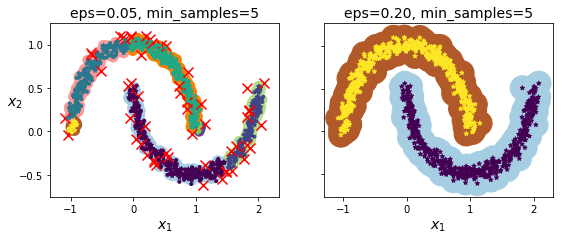

In [147]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

#save_fig("dbscan_diagram")
plt.show()



It identified quite a lot of anomalies, plus 7 different clusters. How disappointing! Fortunately, if we widen each instance’s neighborhood by increasing eps to 0.2, we get the cluster‐ ing on the right, which looks perfect. Let’s continue with this model.

DBSCAN class does not have a `predict()` method, although it has a `fit_predict()` method. In other words, it cannot predict which cluster a new instance belongs to. The rationale for this decision is that several classification algorithms could make sense here, and it is easy enough to train one, for example a KNeighborsClassifier:

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50);
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

given a few new instances, we can predict which cluster they most likely belong to, and even estimate a probability for each cluster. Note that we only trained them on the core instances, but we could also have chosen to train them on all the instances, or all but the anomalies: this choice depends on the final task.

In [149]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]);
knn.predict(X_new)

array([2, 0, 3, 1])

In [150]:
knn.predict_proba(X_new)

array([[0.02, 0.  , 0.64, 0.  , 0.  , 0.34],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.22, 0.  , 0.  , 0.68, 0.1 , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

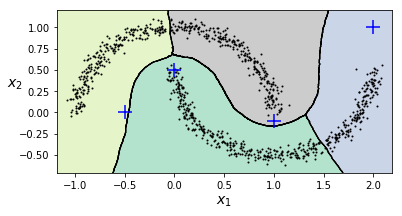

In [151]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
#save_fig("cluster_classification_diagram")
plt.show()

Notice that since there is no anomaly in the KNN’s training set, the classifier always chooses a cluster, even when that cluster is far away. However, it is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies. To do this, we can use the `kneighbors()` method of the `KNeighborsClassifier`: given a set of instances, it returns the distances and the indices of the k nearest neighbors in the training set (two matrices, each with k columns):

In [154]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  4, -1])

 DBSCAN is a very simple yet powerful algorithm, capable of identifying any number of clusters, of any shape, it is robust to outliers, and it has just two hyper‐ parameters (eps and min_samples). However, if the density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly. Moreover, its computational complexity is roughly O(m log m), making it pretty close to linear with regards to the number of instances. However, Scikit-Learn’s implementation can require up to O(m2) memory if eps is large.
 
 # Other algorithms
 ## agglomerative clustering
 Hierarchy of clusters is built from the bottom up. Starting from individual instances, at each iteration agglomertative clustersing connects the nearest pair of clusters. This approach scales very well to large numbers of instances or clus‐ ters, it can capture clusters of various shapes, it produces a flexible and informa‐ tive cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity matrix. This is a sparse m by m matrix that indicates which pairs of instances are neighbors (e.g., returned by `sklearn.neighbors.kneighbors_graph()`). Without a connectivity matrix, the algorithm does not scale well to large datasets.

In [162]:
from sklearn.cluster import AgglomerativeClustering
X = np.array([0,2,5,8.5]).reshape(-1,1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [164]:
def learned_parameters(model):
    return [m for m in dir(model)
            if m.endswith("_") and not m.startswith("_")]
learned_parameters(agg)
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

## Birch
Designed specifically for very large datasets, and it can be faster than batch K-Means, with similar results, as long as the number of fea‐ tures is not too large (<20). It builds a tree structure during training containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree.

## Mean shift
This algorithm starts by placing a circle centered on each instance, then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean. Next, it iterates this mean-shift step until all the circles stop moving (i.e., until each of them is cen‐ tered on the mean of the instances it contains). This algorithm shifts the circles in the direction of higher density, until each of them has found a local density maximum. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster. This has some of the same fea‐ tures as DBSCAN, in particular it can find any number of clusters of any shape, it has just one hyperparameter (the radius of the circles, called the bandwidth) and it relies on local density estimation. However, it tends to chop clusters into pieces when they have internal density variations. Unfortunately, its computational complexity is O(m2), so it is not suited for large datasets.

## Affinity propagation
Affinity propagation: this algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the algorithm converges, each representative and its voters form a cluster. This algorithm can detect any number of clusters of different sizes. Unfortunately, this algorithm has a compu‐ tational complexity of O(m2), so it is not suited for large datasets.

## Spectral clustering
This algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (i.e., it reduces its dimension‐ ality), then it uses another clustering algorithm in this low-dimensional space (Scikit-Learn’s implementation uses K-Means). Spectral clustering can capture complex cluster structures, and it can also be used to cut graphs (e.g., to identify clusters of friends on a social network), however it does not scale well to large number of instances, and it does not behave well when the clusters have very dif‐ ferent sizes.

In [156]:
from sklearn.cluster import SpectralClustering
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=100, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=42)

In [157]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=42)

In [158]:
np.percentile(sc1.affinity_matrix_,95)

0.042944235093162725

In [160]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

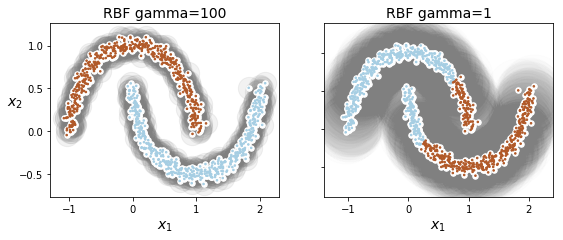

In [161]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

## Gaussian mixture model

In [168]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [169]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10);
gm.fit(X);
gm.weights_

array([0.20961444, 0.40005972, 0.39032584])

In [170]:
gm.means_

array([[ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848],
       [ 0.05145113,  0.07534576]])

In [171]:
gm.covariances_

array([[[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

This class relies on the Expectation- Maximization (EM) algorithm: it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the expectation step) then updating the clusters (this is called the maximization step).

In the context of clustering you can think of EM as a generalization of K- Means which not only finds the cluster centers (μ(1) to μ(k)), but also their size, shape and orientation (Σ(1) to Σ(k)), as well as their relative weights (φ(1) to φ(k)).

Unlike K-Means, EM uses soft cluster assignments rather than hard assignments: for each instance during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the responsibilities of the clusters for the instances.

In [172]:
gm.converged_

True

In [173]:
gm.n_iter_

4

In [174]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0])

In [175]:
gm.predict_proba(X)

array([[2.31833274e-02, 6.76282339e-07, 9.76815996e-01],
       [1.64110061e-02, 6.74575575e-04, 9.82914418e-01],
       [1.99781831e-06, 9.99922764e-01, 7.52377580e-05],
       ...,
       [9.99999568e-01, 2.12540639e-26, 4.31902443e-07],
       [1.00000000e+00, 1.45002917e-41, 5.20915318e-16],
       [1.00000000e+00, 7.93266114e-41, 2.30971331e-15]])

This is a generative model, so you can sample new instances from it (and get their labels):

In [176]:
X_new, y_new = gm.sample(6)
X_new

array([[ 3.53801355,  0.18675944],
       [ 4.22581009, -0.34675399],
       [-2.39773773,  0.06847983],
       [-1.91603507,  0.69665786],
       [-2.82250531, -0.043794  ],
       [-0.41525036,  0.33799745]])

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [177]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225099

In [178]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

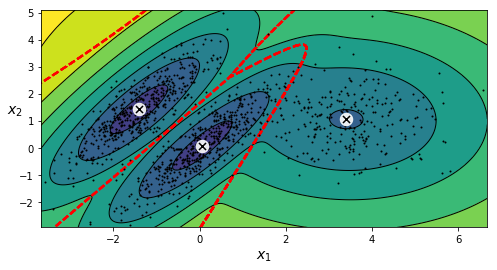

In [180]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

#save_fig("gaussian_mixtures_diagram")
plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [181]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [182]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)



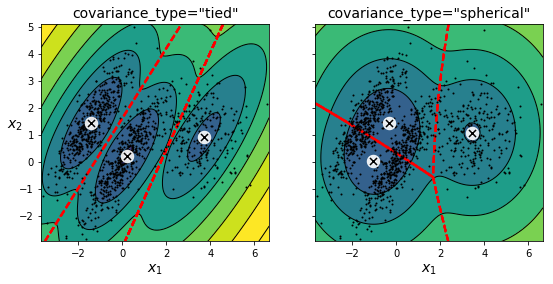

In [183]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

#save_fig("covariance_type_diagram")
plt.show()

The computational complexity of training a GaussianMixture model depends on the number of instances m, the number of dimensions n, the number of clusters k, and the constraints on the covariance matrices. If covariance_type is "spherical or "diag", it is O(kmn), assuming the data has a clustering structure. If cova riance_type is "tied" or "full", it is O(kmn2 + kn3), so it will not scale to large numbers of features.

# anomaly detection
Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. 

 Here is how you would identify the outliers using the 4th percentile low

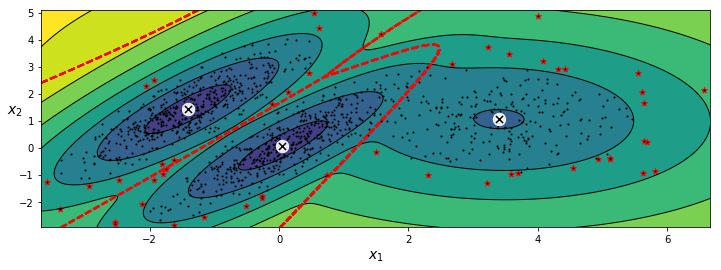

In [186]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold];
plt.figure(figsize=(12, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

#save_fig("mixture_anomaly_detection_diagram")
plt.show()

Gaussian mixture models try to fit all the data, including the outliers. If this happens, you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned up dataset. Another approach is to use robust covariance estimation methods.

### Selecting number of clusters in Gaussian Mixture Models
With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters, but with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes.

You can try to find the model that minimizes a theoretical information criterion such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC).


$$BIC= \log(m)p−2\log(\hat{L})$$
$$AIC= 2p−2\log(\hat{L})$$

$m$ is the number of instances, $p$ is the number of parameters learned by the model, $$\hat{L})$$ is the maximized value of the likelihood function of the model.

They often end up selecting the same model, but when they differ, the model selected by the BIC tends to be sim‐ pler (fewer parameters) than the one selected by the AIC, but it does not fit the data quite as well (this is especially true for larger datasets).

In [189]:
gm.bic(X)

8189.733705221635

#### Manually

In [188]:
gm.aic(X)

8102.508425106597

In [192]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(bic, aic)

8189.733705221635 8102.508425106597


In [193]:
n_params

17

In [194]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [195]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

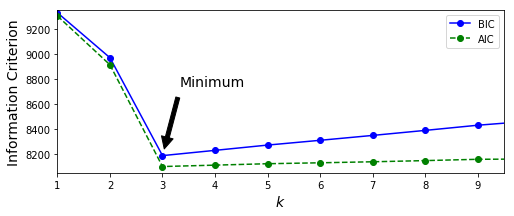

In [197]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
#save_fig("aic_bic_vs_k_diagram")
plt.show()

In [198]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [200]:
best_k, best_covariance_type

(3, 'full')

# Bayesian Gaussian Mixture Model
Rather than manually searching for the optimal number of clusters, it is possible to use instead the BayesianGaussianMixture class which is capable of giving weights equal (or close) to zero to unnecessary clusters

In [201]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [202]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

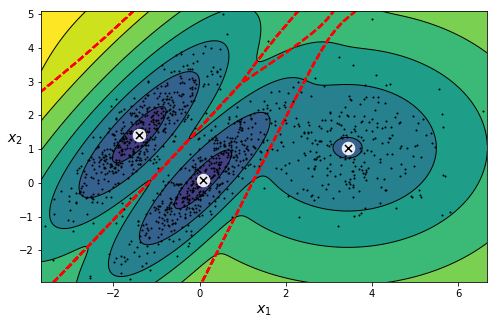

In [203]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [204]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=1000, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=1, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=10000,
            weight_concentration_prior_type='dirichlet_process')

In [205]:
np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [206]:
np.round(bgm_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

### Bayesian Gaussian Mixture Models
Just set the number of clusters n_com ponents to a value that you have good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters automatically.

In [208]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

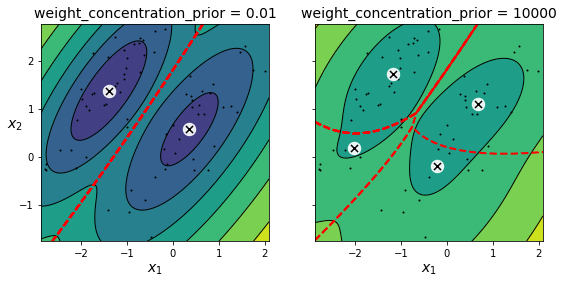

In [212]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

#save_fig("mixture_concentration_prior_diagram")
plt.show()

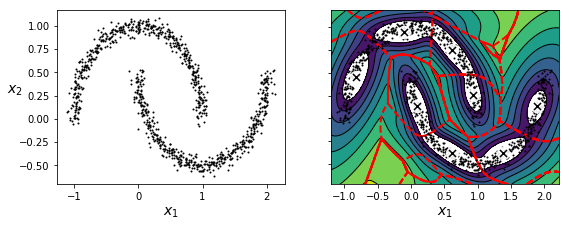

In [217]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

#save_fig("moons_vs_bgm_diagram")
plt.show()

In [218]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

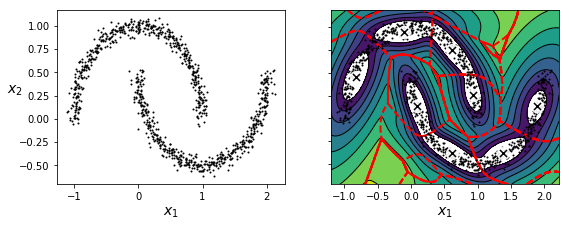

In [219]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

#save_fig("moons_vs_bgm_diagram")
plt.show()

the algorithm desperately searched for ellipsoids, so it found 8 different clus‐ ters instead of 2. The density estimation is not too bad, so this model could perhaps be used for anomaly detection, but it failed to identify the two moons. 

# Anomaly detection algorithms
 - **Fast-MCD** (minimum covariance determinant), implemented by the EllipticEn velope class: this algorithm is useful for outlier detection, in particular to cleanup a dataset. It assumes that the normal instances (inliers) are generated from a single Gaussian distribution (not a mixture), but it also assumes that the dataset is contaminated with outliers that were not generated from this Gaussian distribution. When it estimates the parameters of the Gaussian distribution (i.e., the shape of the elliptic envelope around the inliers), it is careful to ignore the instances that are most likely outliers. This gives a better estimation of the elliptic envelope, and thus makes it better at identifying the outliers.
 - **Isolation forest**: this is an efficient algorithm for outlier detection, especially in high-dimensional datasets. The algorithm builds a Random Forest in which each Decision Tree is grown randomly: at each node, it picks a feature randomly, then it picks a random threshold value (between the min and max value) to split the dataset in two. The dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances. An anomaly is usually far from other instances, so on average (across all the Decision Trees) it tends to get isolated in less steps than normal instances.
 - **Local outlier factor (LOF)**: this algorithm is also good for outlier detection. It compares the density of instances around a given instance to the density around its neighbors. An anomaly is often more isolated than its k nearest neighbors.
 - **One-class SVM**: Since we just have one class of instances, the one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin. In the original space, this will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. There are a few hyperparameters to tweak: the usual ones for a kernelized SVM, plus a margin hyperparameter that corresponds to the probability of a new instance being mistakenly considered as novel, when it is in fact normal. It works great, especially with high-dimensional datasets, but just like all SVMs, it does not scale to large datasets.